# 1. 하나의 변수만을 가지고 맥북의 중고가를 맞춰보기

가장 먼저 중고 맥북의 가격을 맞춰봅시다.

사용 연수와 중고 가격에는 서로 어떤 관계가 있을까요?

## 1.1 데이터 확인하기

먼저 데이터를 불러옵시다! 판다스를 먼저 import 하고 데이터를 불러와봅시다.데이터는 `./bike_regression/data/mackbook.csv` 파일입니다.

In [3]:
import os
import pandas as pd

file_path = os.path.dirname(os.path.abspath('__file__'))
macbook_path = file_path + r"/bike_regression/data/macbook.csv"

In [4]:
macbook = pd.read_csv(macbook_path)
print(macbook.shape)

(80, 2)


In [5]:
macbook.head(10)

,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106
5,2.70,115
6,3.05,177
7,2.25,248
8,2.30,198
9,1.85,219


데이터는 사용 연수를 나타내는 `used_years`와 중고 가격을 나타내는 `price`, 두 열로 이루어져 있습니다.

총 행은 80행으로, 노트북의 개수가 80개라고 보면 될 것 같아요.

데이터를 첫 번째 행부터 살펴봅시다. 사용 년수가 2.65년간 사용되었고, 중고가는 175만원입니다. 두번째 행도 마찬가지로 3.8년간 사용되었고, 중고가는 63만원입니다.


실제로 중고가를 예측하는데에는 컴퓨터 사양이라던가 전체적인 사용감이 영향을 주겠으나, 일단 이 데이터는 사용 연수만 담겨있으니 이 정보만으로 최대한 중고 가격을 맞춰봅시다!

<br/>

## 1.2 데이터 확인하기 (데이터 시각화)

데이터를 가져왔으니 그래프로 시각화해서 데이터를 조금 더 직관적으로 확인해봅시다. 

그래프를 그리기 위해 `matplotlib`를 가져와봅시다.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

그럼 x축에는 사용 연수에 해당하는 used_years를, y축에는 중고가에 해당하는 price를 입력해봅시다.

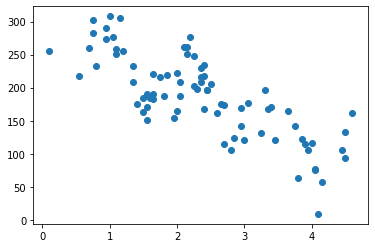

In [7]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

뭔가 패턴이 살짝 보이죠?

사용연수가 높아질수록 중고가는 낮아지는 것 같습니다!


이렇게 한 변수가 커짐에 따라 다른 변수가 작아지는 관계인 경우, 두 변수는 **상관 관계가 있다**라고 합니다. 그리고 그 관계된 정도는 **"(Pearson) 상관계수"** 로 표현할 수 있습니다.

상관계수의 크기에 대해 가장 잘 나타낸 이미지는 아래와 같습니다. 

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/E-7-2.max-800x600_ELGrbw8.png)

위 이미지에서는 두 변수에 대해 데이터가 어떻게 분포하는지 나타낸 그림입니다. 상관계수의 값은 -1에서 1사이의 값을 가집니다. 

*상관 관계가 없다면 상관 계수의 값은 0이고, 상관 관게가 강하다면상관 계수의 절대값이 점점 커집니다.*

- 이미지의 첫 번째 줄을 살펴봅시다.
    - 데이터의 분포가 직선에 가까울수록 상관 계수 값은 -1 또는 1에 가까워집니다.
    - 즉, 두 변수간에 한 변수가 커짐에 따라 다른 변수가 커지거나 작아지는 상호관계성이 강할수록 상관 계수의 절대값이 커집니다.
    - 반면 데이터의 분포가 넓게 퍼지며 0에 가까울수록 상관 계수의 값은 0에 가까워집니다.
    - 특히 원 모양으로 동그랗게 퍼진다면 두 변수간에 어떠한 상관관계도 없다고 할 수 있습니다.
- 그럼 두 번째 줄을 봐봅시다.
    - 두 번째 줄에서 데이터의 분포는 직선이지만 각각의 기울기가 다릅니다.
    - 하지만 상관계수는 '기울기'를 의미하는 것이 아니라 두 변수간에 한 변수가 변함에 따라 다른 변수의 값이 어떻게 변하는지에 대한 '상호적인 관계의 정도'를 나타내는 것이기 때문에, 기울기가 급하든 완만하든 데이터의 분포가 직선에 가깝다면 상관계수는 항상 1 또는 -1에 가까워진다고 할 수 있습니다.
- 마지막 줄은 어떨까요?
    - 데이터의 분포가 어떤 패턴을 가지고 있지만, 양 또는 음의 상관관계를 가지는 것이 아니기 때문에 상관 계수는 0입니다.
    - 이 또한 **상관 관계와 상관계수는 두 변수간의 패턴을 나타내는 것이 아닌, 각 값의 증가 또는 감소에 대한 관계만을 나타내기 때문**입니다.

그럼 우리의 데이터는 무엇일까요?

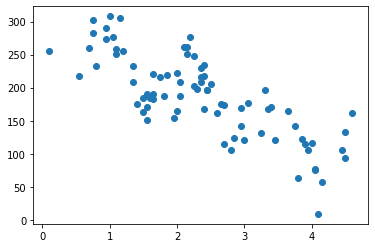

In [9]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

**음의 상관관계**를 가지고 있다고 할 수 있겠죠?


상관관계가 있다면, 상관계수의 값은 어느정도인지 한번 확인해봅시다.

`numpy`에서는 상관계수를 보여주는 `corrcoef()`라는 함수를 제공합니다. 상관관계를 확인하고싶은 두 변수가 있다면 `np.corrcoef(x, y)`형태로 넣어주면 됩니다.

우리의 데이터에서는 -1에서 0 사이의 값이 나올 것 같죠?

In [10]:
import numpy as np

np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

네 행렬로 나왔습니다. 변수가 두개이기 때문이죠! (0, 0) 위치와 (1, 1) 위치는 각각 첫 번째 변수와 첫번째 변수, 두번째 변수와 두번째 변수끼리의 상관계수를 나타내기 때문에 항상 1이 됩니다.

(0, 1)과 (1, 0) 위치에는 첫 번째 변수와 두 번째 변수간의 상관계수가 나타납니다. 약 **-0.79**로 상당히 강한 상관관계가 있네요!

<br/>

## 1.3 예측 모델 만들기

그럼 이제 `used_years`를 입력받으면 중고 가격이 얼마정도에 해당할지 그 값을 예측하는 모델을 만들어봅시다!

입력에 해당하는 `x`에는 `used_years`의 정보를, 출력에 해당하는 `y`에는 `price` 정보를 담아봅시다.

In [12]:
x = macbook['used_years'].values
y = macbook['price'].values

print(x, y)

[2.65 3.8  0.95 4.5  4.45 2.7  3.05 2.25 2.3  1.85 1.5  0.95 2.6  0.55
 2.05 0.75 3.95 2.8  2.05 1.15 1.35 3.35 1.35 2.45 2.4  0.1  3.45 2.35
 0.7  1.05 1.75 4.1  4.5  4.   2.   2.45 2.5  2.1  3.   4.05 2.7  2.15
 3.3  2.4  2.85 1.65 1.55 2.15 3.4  1.55 0.8  2.95 2.4  1.4  1.65 2.25
 3.85 3.9  4.6  2.35 4.05 1.2  1.95 1.6  2.   1.8  3.75 3.65 2.35 2.2
 1.   4.15 1.1  1.55 2.95 1.5  1.65 1.1  3.25 0.75] [175  63 273 133 106 115 177 248 198 219 163 290 162 217 188 282 106 106
 208 306 232 168 209 196 217 256 121 216 260 277 216   9  94 116 165 197
 205 262 121  77 174 251 197 234 124 183 190 261 170 170 233 169 168 176
 221 202 123 115 161 229  76 255 154 185 222 188 142 165 209 276 308  57
 258 151 142 184 191 251 131 303]



![img](https://aiffelstaticprd.blob.core.windows.net/media/images/E-7-1.max-800x600_zqSi1aS.png)

우리는 이런 직선을 찾게된다면 좋을 것 같습니다! 우리는 y = w\*x + b 형태의 모델을 생각할 예정입니다. 그럼 최적의 w와 b를 찾아야겠죠? 


최적의 값을 찾아나기기 위해서 우리는 **손실함수**라는 새로운 지표를 설정합니다. 바로 **아직 불완전한 현재의 모델이 출력하는 값과 실제 정답간의 차이**를 확인하는 거죠.

완벽한 정답 함수는 존재하지 않더라도, 모델의 출력값과 실제 정답간의 차이를 계산할 수 있고 그 값을 점차 줄여나갈 수 있다면 최적의 함수에 가까워지겠죠?

따라서 우리는 먼저 1) 모델이 출력하는 값과 실제 정답간의 차이를 계산하고 2) 그 차이를 단계적으로 줄여나가는 순서로 모델을 학습시켜 나갈 것입니다.


먼저 오차(실제값과 예측값의 차이)를 계산하는 방법에는 여러가지가 있습니다.

1. MAE : Mean Absolute Error, 오차의 절댓값의 평균
2. MSE : Mean Squared Error, 오차의 제곱의 평균
3. RMSE : Root Mean Squared Error, MSE의 제곱근
4. R-squared : Coefficient of Determination, 결정 계수

위의 네가지 모두 많이 사용하지만, 그중 가장 많이 사용되는 것은 **RMSE**입니다. RMSE는 말 글대로 MSE를 제곱근 한 값인데, MSE는 제곱된 오차들의 평균이기 때문에 그 값의 단위를 원래 정답값과 맞춰주고자 제곱근을 씌운다는 개념이 있습니다. 

RMSE 값은 구하는 함수는 아래와 같이 간단히 구현할 수 있습니다.

In [13]:
def RMSE(a, b):
    mse = ((a-b)**2).mean() # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5
    return rmse

그럼 한번 rmse를 생각해볼까요?

w와 b에 우리가 임의로 정한 값을 넣어주고 rmse를 생각해봅시다!

In [14]:
w, b = 3.1, 2.3

def model(x, w, b):
    y = w * x + b
    return y

predictions = model(x, w, b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [15]:
rmse = RMSE(predictions, y)
rmse

188.81322969819274

아직 모델이 너무나 부정확하기 때문에 `rmse` 값이 매우 크게 나타납니다.

이렇듯 모델의 예측값과 정답값에 대한 차이를 계산하는 함수를 **손실함수(loss function)** 또는 **비용함수(cost function)** 라고 부릅니다. <br/>현재 모델이 얼마나 손실을 내고 있는지 나타낸다는 개념으로 이해할 수 있습니다. 


즉, 손실값(loss)가 크다는 것은 모델이 현재 정답과 굉장히 먼 예측을 하고 있다는 뜻이고, 손실값이 작을수록 올바른 예측을 하고있다는 것입니다. 따라서 손실값은 작을수록 좋습니다!



그러면 우리의 손실함수를 RMSE를 활용해 다음과 같이 정의해볼까요?

In [16]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

손실함수는 **모델이 예측하는 출력값과 정답값 간의 거리를 나타내는 함수**라고도 할 수 있습니다. 

그럼 `rmse`, 즉 우리 모델의 손실함수 값을 줄여나가볼까요?

### 1.3.1 기울기와 경사하강법 (Gradient Descent)

우리의 포커스는 최적의 `w`값과 `b` 값을 구하는 것입니다. 

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/E-7-3.max-800x600.png)

위 그래프의 x축은 w고, y축은 손실함수의 값, `loss`입니다. 즉, 위 그래프는 *w값에 따른 손실함수* 그래프를 그려놓은 것이죠.

그럼 우리는 최적의 w값을 어떻게 구할 수 있을까요?

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/E-7-4.max-800x600_aN5VFfU.png)

간단합니다! 저렇게 경사를 타고 내려온다면 loss값이 가장 작아지는 최적의 w를 구할 수 있겠죠?

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/E-7-5.max-800x600_JhLxNuH.png)

이렇게 음의 기울기를 가지는 값과 양의 기울기를 가지는 값을 모두 기울기가 0에 수렴할 수 있도록 w를 조정해나가면 될 것 같습니다. 

이렇게 기울기를 사용해서 점차적으로 매개변수를 업데이트 하는 방식을 **Gradient Descent**, 즉 **경사하강법**이라고 합니다.

그러면 기울기를 구하느 함수를 구해봅시다! 특정 점에서 미분값은 실제로는 극한을 사용해서 변화량을 0에 수렴하도록 하지만, 값을 구하는데 충분히 작은 값이면 충분하기 때문에 우리는 그냥 0.0001로 두고 계산하겠습니다. 이렇게 수학적으로 아주 정확한 값은 아니지만 근사한 미분 계수 값을 찾는 방법을 *수치 미분* 이라고 합니다.



In [17]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y))/0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y))/0.0001
    return dw, db

자 이제 손실함수와 기울기가 모두 준비되었습니다. 단계별로 최적의 w와 b에 접근하며 최적의 모델, `w*x + b`를 찾아나가봅시다!

먼저 경사하강법에서 필요한 학습률, `LEARNING_RATE` 상수를 정의하고 시작합시다!

In [18]:
LEARNING_RATE = 1

학습률은 1이 아니어도 됩니다. 어떤 학습률을 사용하는 것이 가장 좋은지는 실제로 해보기 전에는 모릅니다.

이렇게 학습률과 같이 모델이 스스로 학습해나가는 파라미터가 아니라 **사람이 직접 사전에 정하고 시작해야하는 파라미터**를 **하이퍼 파라미터** 라고 합니다.

예전에는 최적의 파라미터는 사람이 직접 찾아야 하기 때문에 많은 실험을 해서 찾을 수 밖에 없었는데요, 최근에는 최적의 하이퍼 파라미터를 찾기 위한 여러가지 도구들이 많이 개발되고 있습니다.

우리는 간단한 실험이니 적당히 1로 설정했습니다. 복잡한 데이터셋에서는 보통 학습률을 `0.0001` ~ `0.01` 정도의 작은 값으로 사용합니다.

이제 아래와 같은 순서로 코드를 구현하면 됩니다!


1. 입력 데이터 x와 정답 데이터 y 준비
2. 초기 w, b를 랜덤하게 선택
3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산
4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
5. 계산된 gradient를 활용해서 
w
′
=
w
−
η
g
 , 
b
′
=
b
−
η
g
 로 업데이트
6. 3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복




In [19]:
# 1. 입력데이터 x와 정답 데이터 y 준비
x = macbook['used_years'].values
y = macbook['price'].values

In [20]:
# 2. 초기 w와 b를 랜덤하게 선택
w = 3.1
b - 2.3

0.0

손실함수의 값이 단계별로 얼마정도인지를 저장할 `losses`라는 빈 리스트를 준비해줍시다.

In [21]:
losses = []

그럼 이제 학습을 해봅시다! 3번~5번 과정을 반복해서 학습한다고 했습니다. 그럼 몇번정도 반복하는 것이 좋을까요?

무작정 많이 학습을 하는 것도 능사는 아닙니다. 과적합의 문제가 있기 때문이죠. 우리는 적당히 2000번을 학습해봅시다!


In [22]:
for i in range(1, 2001):
    dw, db = gradient(x, w, b , y)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(x, w, b, y)
    losses.append(L)
    if i % 100 == 0:
        print("Iteration %d : Loss %0.4f" % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


학습을 해나갈수록 loss 값이 떨어지고 있어요! 

모든 loss 값을 losses 리스트에 저장해두었으니 그래프로 한번 확인해봅시다.

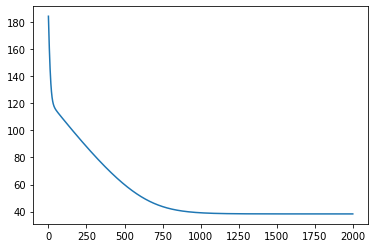

In [23]:
plt.plot(losses)
plt.show()

초기 180 이상으로 매우 컸던 loss 값이 40 이하로 잘 떨어지고 있슶니다. 

확인해보면 1000 이하로는 별로 떨어지지가 않네요! 거의 최적에 도달했기 때문에 아무리 업데이트를 해도 더이상 떨어지지 않는 단계에 다다른 것 같아 보입니다.

그럼 w와 b값을 한번 확인해봅시다!

In [24]:
print(w, b)

-44.92756090768412 293.0815786721102


적당한 값들로 수렴한 것 같습니다. 

그럼 이제 원래 우리의 데이터와 학습이 완료된 모델, 일차함수를 함께 그려봅시다.

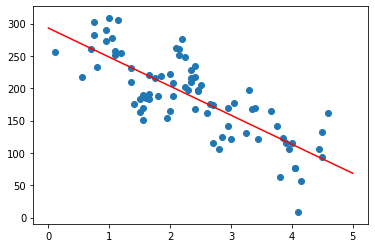

In [25]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")

# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

와~ 우리가 원하던 그림이 나왔습니다! 

<br/>

## 1.4 모델 테스트

그럼 우리가 학습했던 데이터 말고, 새로운 데이터를 입력해도 효과적으로 예측을 해낼 수 있는지 테스트해봅시다.

새로운 테스트 데이터인 `macbook_test`를 가져와봅시다.

In [27]:
test_path = os.path.dirname(os.path.abspath('__file__'))
test_path += r'/bike_regression/data/macbook_test.csv'

test = pd.read_csv(test_path)
print(test.shape)
test.head(10)

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176
5,3.35,136
6,2.55,133
7,2.60,181
8,2.50,181
9,3.10,86


20개의 데이터가 있는 간단한 데이터군요. 위 데이터도 우리 모델이 잘 맞출 수 있을까요?

test 데이터를 새로 test_x와 test_y로 만들어보겠습니다.

In [28]:
test_x = test['used_years'].values
test_y = test['price'].values

이제 모델에게 새로운 `test_x` 데이터를 넣어서 `test_prediction`을 구해봅시다!

In [30]:
test_prediction = model(test_x, w, b)
test['prediction'] = test_prediction
test.head(10)

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


언뜻 보았을 때 비슷해보입니다!! `error`를 직접 계산해서 넣어봅시다.

In [31]:
test['error'] = test['price'] - test['prediction']
test.head(10)

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


RMSE 값도 직접 구해볼까요?

In [33]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.03918284717212

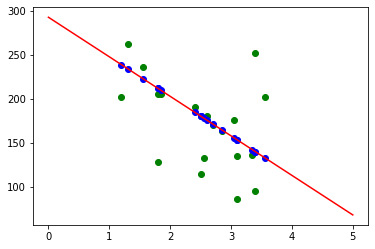

In [35]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'], color='green')

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'], color='blue')
plt.show()

초록색이 실제값, 파란색이 예측값입니다.

오차가 좀 있지만 일차함수 치곤 꽤 잘한 것 같죠? ^^!!